# Time Series

In [1]:
# Time Series data is an important form of structured data in many different fields, such as finance,economics,ecology, neuroscience, and physics. Anything that is observed or measured at many points in time forms a time series. Many time series are fixed frequency, which is to say that data points occur at regular intervals according to some rule, such as every 15 seconds, every 5 minutes, or once per month. Time series can also be irregular without a fixed unit of time or offset between units. How you mark and refer to time series data depends on the application, and you may have one of the following:
# Timestamps, specific instants in time 
# Fixed periods, such as the month January 2007 or the full year 2010
# Intervals of time, indicated by a start and end timestamp. Periods can be thought of as special cases of intervals
# Experiment or elapsed time; each timestamp is a measure of time relative to a particular start time (e.g., the diameter of a cookie baking each second since being placed in the oven)

# Date and Time Data Types and Tools

In [2]:
#  The python standard library includes data types for date and time data, as well as calendar-related functionality.
# The datetime, time, and calendar modules are the main places to start. The datetime.datetime type or simply datetime is widely used:
from datetime import datetime
now = datetime.now()
print(now)

2024-01-30 16:36:36.265225


In [3]:
now.year, now.month, now.day 

(2024, 1, 30)

In [4]:
# datetime stores both the date and time down to the microsecond. datetime.timedelta represents the temporal difference between tow datetime objects"ch6_data loading_storage and file formats.ipynb
delta = datetime(2011,1,7) - datetime(2008,6,24,8,15) # 2011-01-07 00:00:00 - 2008-06-24 08:15:00 = 926 days, 15:45:00

In [5]:
delta.days

926

In [6]:
delta.seconds

56700

In [7]:
# you can add (or substract) a timedelta or multiple thereof to a datetime object to yield a new shifted object:
from datetime import timedelta 
start = datetime(2011,1,7)

In [12]:
from datetime import datetime 
start + timedelta(12) # 2011-01-19 00:00:00 

datetime.datetime(2011, 1, 19, 0, 0)

In [13]:
# Types in datetime module 
# date stores the calendar date(year, month, day) using the Gregorian calendar 
# time stores the time as hours, minutes, seconds, and microseconds
# datetime stores both date and time
# timedelta represents the difference between two datetime values as days, seconds, and microseconds

# Converting between string and datetime 

datetime objects and pandas Timestamp objects can be converted to one another very easily:

```python

In [14]:
from turtle import stamp


stamp = datetime.now() # 2019-11-05 15:54:00.000000
str(stamp) # '2019-11-05 15:54:00.000000' 

'2024-01-30 16:48:01.991575'

In [15]:
stamp.strftime('%Y-%m-%d') # '2019-11-05' 

'2024-01-30'

In [16]:
# for a complete list of the format codes. These same format codes can be used to convert strings to dates using datetime.strptime: 
value = '2011-01-03'

In [17]:
datetime.strptime(value, '%Y-%m-%d') # datetime.datetime(2011, 1, 3, 0, 0) 

datetime.datetime(2011, 1, 3, 0, 0)

In [18]:
datestrs= ['7/6/2011', '8/6/2011']

In [19]:
datestrs 

['7/6/2011', '8/6/2011']

In [20]:
[datetime.strptime(x, '%m/%d/%Y') for x in datestrs] # [datetime.datetime(2011, 7, 6, 0, 0), datetime.datetime(2011, 8, 6, 0, 0)] 


[datetime.datetime(2011, 7, 6, 0, 0), datetime.datetime(2011, 8, 6, 0, 0)]

In [21]:
# datetime.strptime is the best way to parse a date with a known format. However, it can be a bit annoying to have to 
# write a format spec each time, especially for common date formats. 
# In this case, you can use the parser.parse method in the third-party dateutil package (this is installed automatically when you install pandas): 
from dateutil.parser import parse 
parse('2011-01-03') # datetime.datetime(2011, 1, 3, 0, 0) 

datetime.datetime(2011, 1, 3, 0, 0)

In [22]:
# dateutil is capable of parsing most human-intelligible date representations: 
parse('Jan 31, 1997 10:45 PM') # datetime.datetime(1997, 1, 31, 22, 45) 

datetime.datetime(1997, 1, 31, 22, 45)

In [23]:
# In internationally locales, day apprearing before month is very common, so you can pass dayfirst=True to indicate this:
parse('6/12/2011', dayfirst=True) # datetime.datetime(2011, 12, 6, 0, 0) 

datetime.datetime(2011, 12, 6, 0, 0)

In [24]:
# pandas is generally oriented toward working with arrays of dates, whether used as an axis index or a column in a DataFrame.
# The to_datetime method parses many different kinds of date representations. Standard date formats like ISO 8601 can be parsed very quickly: 
import pandas as pd 
datestrs = ['2011-07-06 12:00:00', '2011-08-06 00:00:00'] 

In [25]:
pd.to_datetime(datestrs) # DatetimeIndex(['2011-07-06 12:00:00', '2011-08-06'], dtype='datetime64[ns]', freq=None) 

DatetimeIndex(['2011-07-06 12:00:00', '2011-08-06 00:00:00'], dtype='datetime64[ns]', freq=None)

In [26]:
# It also handles values that should be considered missing (None, empty string, etc.): 
idx = pd.to_datetime(datestrs + [None]) 

In [27]:
idx

DatetimeIndex(['2011-07-06 12:00:00', '2011-08-06 00:00:00', 'NaT'], dtype='datetime64[ns]', freq=None)

In [28]:
# Datetime format specification (ISO C89 compatible) 
# %Y 4-digit year
# %y 2-digit year
# %m 2-digit month [01,12]
# %d 2-digit day [01,31]
# %H Hour (24-hour clock)[00,23]
# %I Hour (12-hour clock)[01,12]
# %M 2-digit minute [00,59]
# %S Second [00,61] (seconds 60,61 account for leap seconds)
# %w Weekday as integer [0(Sunday),6]
# %U Week number of the year [00,53]; Sunday is considered the first day of the week, and days before the first Sunday of the year are “week 0”
# %W Week number of the year [00,53]; Monday is considered the first day of the week, and days before the first Monday of the year are “week 0”
# %z UTC time zone offset as +HHMM or -HHMM; empty if time zone naive
# %F Shortcut for %Y-%m-%d (e.g., 2012-4-18)
# %D Shortcut for %m/%d/%y (e.g., 04/18/12)

In [29]:
#datetime objects also have a number of locale-specific formatting options for systems in other countries or languages. 
# For example, in German, the day appears before the month:
# 2011-03-12 04:00:00 PM -> 12.03.2011 16:00:00
# The German locale (and others) can be indicated in pandas like so:
pd.to_datetime(datestrs[0], dayfirst=True) # Timestamp('2011-06-07 12:00:00')

Timestamp('2011-07-06 12:00:00')

In [30]:
# Locale - specific date formatting 
# %a Weekday as locale’s abbreviated name. Sun, Mon, ..., Sat (en_US); So, Mo, ..., Sa (de_DE)
# %A Weekday as locale’s full name. Sunday, Monday, ..., Saturday (en_US); Sonntag, Montag, ..., Samstag (de_DE)
# %b Month as locale’s abbreviated name. Jan, Feb, ..., Dec (en_US); Jan, Feb, ..., Dez (de_DE)
# %B Month as locale’s full name. January, February, ..., December (en_US); Januar, Februar, ..., Dezember (de_DE)
# %c Locale’s appropriate date and time representation. Tue Aug 16 21:30:00 1988 (en_US); Di 16 Aug 21:30:00 1988 (de_DE)
# %p Locale’s equivalent of either AM or PM. AM, PM (en_US); am, pm (de_DE)
# %x Locale’s appropriate date representation. 08/16/88 (None); 08/16/1988 (en_US); 16.08.1988 (de_DE)
# %X Locale’s appropriate time representation. 21:30:00 (en_US); 21:30:00 (de_DE)

# Time Series Basics 
The most basic kind of time series object in pandas is a Series indexed by timestamps, which is often represented external to pandas as Python strings or datetime objects: 

```python

In [2]:
from datetime import datetime

dates = [
    datetime(2011,1,2), datetime(2011,1,5), datetime(2011,1,7), 
    datetime(2011,1,8), datetime(2011,1,10), datetime(2011,1,12)
    ]


In [3]:
from pandas import Series, DataFrame 
import numpy as np 
ts = Series (np.random.randn(6), index=dates)

In [4]:
ts

2011-01-02   -0.191806
2011-01-05    1.348229
2011-01-07    0.228457
2011-01-08    0.941104
2011-01-10    2.017281
2011-01-12    0.614095
dtype: float64

In [5]:
# Under the hood, these datetime objects have been put in a DatatimeIndex: 
# and the variable ts is now of type TimeSeries 
type(ts) # pandas.core.series.Series 

pandas.core.series.Series

In [6]:
ts.index 

DatetimeIndex(['2011-01-02', '2011-01-05', '2011-01-07', '2011-01-08',
               '2011-01-10', '2011-01-12'],
              dtype='datetime64[ns]', freq=None)

In [7]:
# Like other Series, arithmetic operations between 
# differently-indexed time series automatically align on the dates: 
ts + ts[::2] # 2011-01-02 00:00:00   -0.168180
            # 2011-01-05 00:00:00         NaN
            # 2011-01-07 00:00:00   -0.759805
            # 2011-01-08 00:00:00         NaN
            # 2011-01-10 00:00:00    0.669935
            # 2011-01-12 00:00:00         NaN
            # dtype: float64

2011-01-02   -0.383613
2011-01-05         NaN
2011-01-07    0.456914
2011-01-08         NaN
2011-01-10    4.034562
2011-01-12         NaN
dtype: float64

In [8]:
# pandas stores timestamps using NumPy's datetime64 data type at the nanosecond resolution: 
ts.index.dtype # dtype('<M8[ns]') 

dtype('<M8[ns]')

In [9]:
# Scalar values from a DatetimeIndex are pandas Timestamp objects: 
stamp = ts.index[0] 

In [10]:
stamp 

Timestamp('2011-01-02 00:00:00')

In [11]:
# A Timestamp can be substituted anywhere you would use a datetime object. Additionally, it can store frequency 
# information (if any) and understands how to do time zone conversions and other kinds of manipulations. 

# Indexing, Selection, Subsetting

In [12]:
# Timeseries is a subclass of Series and thus behaves in the same way with regard to many arithmetic functions: 
stamp = ts.index[2] # 2011-01-07 00:00:00 

In [13]:
ts[stamp] 

0.22845706703857016

In [14]:
# As a convenience, you can also pass a string that is interpretable as a date: 
ts['1/10/2011'] 

2.0172809964902885

In [15]:
ts['20110110']

2.0172809964902885

In [17]:
# For longer time series, a year or only a year and month can be passed to easily select slices of data: 
import pandas as pd 
longer_ts = Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000)) 

In [18]:
longer_ts 

2000-01-01   -0.594228
2000-01-02    0.433961
2000-01-03    1.041535
2000-01-04   -0.699783
2000-01-05    0.638649
                ...   
2002-09-22   -0.231598
2002-09-23   -0.961379
2002-09-24    1.503900
2002-09-25    0.589409
2002-09-26   -1.130632
Freq: D, Length: 1000, dtype: float64

In [19]:
longer_ts['2001'] 

2001-01-01    0.852516
2001-01-02    1.398564
2001-01-03   -1.095709
2001-01-04   -0.902604
2001-01-05    0.683059
                ...   
2001-12-27   -0.866160
2001-12-28   -0.595024
2001-12-29    0.237672
2001-12-30    0.085976
2001-12-31    0.750141
Freq: D, Length: 365, dtype: float64

In [20]:
longer_ts['2001-05']

2001-05-01   -0.608742
2001-05-02   -0.318897
2001-05-03    0.097457
2001-05-04    0.828169
2001-05-05    0.680986
2001-05-06    0.123383
2001-05-07   -1.711345
2001-05-08   -1.253020
2001-05-09   -0.599664
2001-05-10    0.698987
2001-05-11   -0.163755
2001-05-12    1.368672
2001-05-13   -0.028034
2001-05-14    0.243480
2001-05-15   -0.376212
2001-05-16    0.890416
2001-05-17    0.293890
2001-05-18    0.772936
2001-05-19    0.135351
2001-05-20   -0.528528
2001-05-21   -0.283064
2001-05-22   -0.702420
2001-05-23   -0.188870
2001-05-24   -1.020628
2001-05-25   -0.870698
2001-05-26   -1.342409
2001-05-27    1.240621
2001-05-28    0.052077
2001-05-29    0.661220
2001-05-30    0.984947
2001-05-31    0.689535
Freq: D, dtype: float64

In [21]:
# Slicing with dates works just like with a regular Series: 
ts[datetime(2011,1,7):]

2011-01-07    0.228457
2011-01-08    0.941104
2011-01-10    2.017281
2011-01-12    0.614095
dtype: float64

In [22]:
# Because most time series data is ordered chronologically, you can slice with timestamps not contained in a time series to perform a range query: 
ts 

2011-01-02   -0.191806
2011-01-05    1.348229
2011-01-07    0.228457
2011-01-08    0.941104
2011-01-10    2.017281
2011-01-12    0.614095
dtype: float64

In [23]:
ts['1/6/2011':'1/11/2011']  

2011-01-07    0.228457
2011-01-08    0.941104
2011-01-10    2.017281
dtype: float64

In [24]:
# As before you can pass either a string date, datetime, or timestamp. 
# Remember that slicing in this manner produces views on the source time series just like slicing NumPy arrays. 
# There is an equivalent instance method truncate which slices a Series between two dates: 

ts.truncate(after='1/9/2011') 

2011-01-02   -0.191806
2011-01-05    1.348229
2011-01-07    0.228457
2011-01-08    0.941104
dtype: float64

In [25]:
# All of the above holds true for DataFrame, too, indexing on its rows: 
dates = pd.date_range('1/1/2000', periods=100, freq='W-WED') 

In [26]:
long_df = DataFrame(np.random.randn(100,4), index=dates, columns=['Colorado', 'Texas', 'New York', 'Ohio'])  

In [27]:
long_df.loc['5-2001'] 

,Colorado,Texas,New York,Ohio
2001-05-02,-0.028066,-2.563557,-0.591534,0.273903
2001-05-09,-0.934964,-0.973781,-0.289601,1.061917
2001-05-16,-0.796096,1.027706,0.925750,-2.077534
2001-05-23,1.042699,-0.311563,0.592067,-1.467479
2001-05-30,-0.150522,0.754206,-1.315557,-0.144438


# Time Series with Duplicate Indices 

In [28]:
# In some applications, you may wish to use time series data indexed by timestamps as 
# if it were a fixed frequency like daily or monthly, even if it is not.
# The asfreq method enables this. We use the same long_ts time series from above:

dates = pd.DatetimeIndex(['1/1/2000', '1/2/2000', '1/2/2000', '1/2/2000', '1/3/2000']) 

In [29]:
dup_ts = Series(np.arange(5), index=dates)  
dup_ts

2000-01-01    0
2000-01-02    1
2000-01-02    2
2000-01-02    3
2000-01-03    4
dtype: int64

In [30]:
# We can tell that the index is not unique by checking its is_unique property: 
dup_ts.index.is_unique # False 

False

In [31]:
# Indexing into this time series will either produce scalar values or slices depending on whether a timestamp is duplicated:
dup_ts['1/3/2000'] # 4 

4

In [32]:
dup_ts['1/2/2000'] # 1/2/2000    1 1/2/2000    2 1/2/2000    3 dtype: int64

2000-01-02    1
2000-01-02    2
2000-01-02    3
dtype: int64

In [33]:
# Suppose you wanted to group the data by timestamp and apply a group function like sum. 
# One way to do this is to use the groupby and pass level=0 (the only level of indexing): 
grouped = dup_ts.groupby(level=0) 

In [34]:
grouped.mean()

2000-01-01    0.0
2000-01-02    2.0
2000-01-03    4.0
dtype: float64

In [35]:
grouped.count() 

2000-01-01    1
2000-01-02    3
2000-01-03    1
dtype: int64

# Date Ranges, Frequencies, and Shifting

In [36]:
# Generic time series in pandas are assumed to be irregular, that is, they have no fixed frequency.For many applications 
# this is sufficient.However, it's often desirable to work relative to a fixed frequency, such as daily, monthly, or every 15 mins. 
# even if that means introducing missing values into a time series.
# Fortunately, pandas has a full suite of standard time series frequencies and tools for resampling, inferring frequencies,
# and generating fixed frequency date ranges. 
# For example, in the example time series, converting it to be fixed daily frequency can be accomplished by calling resample: 

ts 

2011-01-02   -0.191806
2011-01-05    1.348229
2011-01-07    0.228457
2011-01-08    0.941104
2011-01-10    2.017281
2011-01-12    0.614095
dtype: float64

In [37]:
ts. resample('D') 

# Generating Date Ranges 
While I used it previously without explanation, you may have guessed that pandas.date_range is responsible for generating a DatetimeIndex with an indicated length according to a particular frequency: 


In [38]:
index = pd.date_range('4/1/2012', '6/1/2012') 

In [39]:
index 

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20',
               '2012-04-21', '2012-04-22', '2012-04-23', '2012-04-24',
               '2012-04-25', '2012-04-26', '2012-04-27', '2012-04-28',
               '2012-04-29', '2012-04-30', '2012-05-01', '2012-05-02',
               '2012-05-03', '2012-05-04', '2012-05-05', '2012-05-06',
               '2012-05-07', '2012-05-08', '2012-05-09', '2012-05-10',
               '2012-05-11', '2012-05-12', '2012-05-13', '2012-05-14',
               '2012-05-15', '2012-05-16', '2012-05-17', '2012-05-18',
               '2012-05-19', '2012-05-20', '2012-05-21', '2012-05-22',
               '2012-05-23', '2012-05-24', '2012-05-25', '2012-05-26',
      

In [42]:
# By default, date_range generates daily timestamps.If you  pass only a start or end date, you must pass a number of periods to generate. 
pd.date_range(start='4/1/2021', periods=25) 

DatetimeIndex(['2021-04-01', '2021-04-02', '2021-04-03', '2021-04-04',
               '2021-04-05', '2021-04-06', '2021-04-07', '2021-04-08',
               '2021-04-09', '2021-04-10', '2021-04-11', '2021-04-12',
               '2021-04-13', '2021-04-14', '2021-04-15', '2021-04-16',
               '2021-04-17', '2021-04-18', '2021-04-19', '2021-04-20',
               '2021-04-21', '2021-04-22', '2021-04-23', '2021-04-24',
               '2021-04-25'],
              dtype='datetime64[ns]', freq='D')

In [43]:
# The start and end dates define strict boundries for the  generated date index. For example, 
# if you wanted a date index containing the last business day of each month, 
# you can would pass the "BM"  frequency(business end of month) and only dates falling on or inside the date interval will be included: 
pd.date_range('1/1/2000', '12/1/2000', freq='BM' ) 

DatetimeIndex(['2000-01-31', '2000-02-29', '2000-03-31', '2000-04-28',
               '2000-05-31', '2000-06-30', '2000-07-31', '2000-08-31',
               '2000-09-29', '2000-10-31', '2000-11-30'],
              dtype='datetime64[ns]', freq='BM')

In [44]:
# date_range by default preserves the time(if any) of the start or end timestamp: 
pd.date_range('5/1/2021  12:56:31',  periods=5) 

DatetimeIndex(['2021-05-01 12:56:31', '2021-05-02 12:56:31',
               '2021-05-03 12:56:31', '2021-05-04 12:56:31',
               '2021-05-05 12:56:31'],
              dtype='datetime64[ns]', freq='D')

In [45]:
# Sometimes you will have start or end with time information but want to generate a set of timestamp normalized to midnight as a convention. 
# To do this, there is a normalize option: 

pd.date_range('5/2/2012  12:56:31', periods=5, normalize=True) 

DatetimeIndex(['2012-05-02', '2012-05-03', '2012-05-04', '2012-05-05',
               '2012-05-06'],
              dtype='datetime64[ns]', freq='D')

# Frequencies and Date Offsets

In [46]:
# Frequencies in pandas are composed of a base frequency and multiplier.
# Base frequencies are typically referred to by a string alias, like 'M' for monthly or 'H' for hourly. 
# For each base frequency, there is an object defined generally referred to as a date offset. 

from pandas.tseries.offsets import Hour, Minute 
hour= Hour() 

In [47]:
hour

<Hour>

In [48]:
# You can define a multiple of an offset by passing an integer: 
four_hours = Hour(4) 

In [49]:
four_hours 

<4 * Hours>

In [50]:
# In most applications, you would never need to explicitly create one of these objects, 
# instead using a string alias like 'H' or '4H'. 
# Putting an integer before the base frequency creates a multiple: 
pd.date_range('1/1/2000', '1/3/2000 23:59', freq='4h') 

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 04:00:00',
               '2000-01-01 08:00:00', '2000-01-01 12:00:00',
               '2000-01-01 16:00:00', '2000-01-01 20:00:00',
               '2000-01-02 00:00:00', '2000-01-02 04:00:00',
               '2000-01-02 08:00:00', '2000-01-02 12:00:00',
               '2000-01-02 16:00:00', '2000-01-02 20:00:00',
               '2000-01-03 00:00:00', '2000-01-03 04:00:00',
               '2000-01-03 08:00:00', '2000-01-03 12:00:00',
               '2000-01-03 16:00:00', '2000-01-03 20:00:00'],
              dtype='datetime64[ns]', freq='4H')

In [51]:
# Many offsets can be combined together by addition: 
Hour(2) + Minute(30)  # <150 * Minutes> 

<150 * Minutes>

In [52]:
# Similarly, you can pass frequency strings like '2h30min' which will effectively be parsed to the same expression: 
pd.date_range('1/1/2000', periods=10, freq='2h30min') 

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 02:30:00',
               '2000-01-01 05:00:00', '2000-01-01 07:30:00',
               '2000-01-01 10:00:00', '2000-01-01 12:30:00',
               '2000-01-01 15:00:00', '2000-01-01 17:30:00',
               '2000-01-01 20:00:00', '2000-01-01 22:30:00'],
              dtype='datetime64[ns]', freq='150T')

In [53]:
# Base Time Series Frequencies 
# Alias       Offset type       Description 
# D           Day              Calendar day
# B           BusinessDay      Business day
# H           Hour             Hourly
# T or min   Minute           Minutely
# S           Second           Secondly
# L or ms    Milli             Millisecond
# U           Micro            Microsecond
# M           MonthEnd         Last calendar day of month
# BM          BusinessMonthEnd Last business day of month
# MS          MonthBegin       First calendar day of month
# BMS         BusinessMonthBegin First weekday of month
# W-MON, W-TUE, ... Week           Weekly on given day of week
# WOM-1MON, WOM-2MON, ... WeekOfMonth     Generate weekly dates in the first, second, third, or fourth week of the month
# Q-JAN, Q-FEB, ... QuarterEnd      Quarter end, anchored on last calendar day of month
# BQ-JAN, BQ-FEB, ... BusinessQuarterEnd Quarter end, anchored on last weekday day of month
# QS-JAN, QS-FEB, ... QuarterBegin    Quarter begin, anchored on first calendar day of month
# BQS-JAN, BQS-FEB, ... BusinessQuarterBegin Quarter begin, anchored on first weekday day of month
# A-JAN, A-FEB, ... YearEnd         Annual (year) end, anchored on last calendar day of given month
# BA-JAN, BA-FEB, ... BusinessYearEnd Annual (year) end, anchored on last weekday day of given month
# AS-JAN, AS-FEB, ... YearBegin       Annual (year) begin, anchored on first calendar day of given month
# BAS-JAN, BAS-FEB, ... BusinessYearBegin Annual (year) begin, anchored on first weekday day of given month

# Week of month dates  
One useful frequency class is “week of month,” starting with WOM. This enables you to get dates like the third Friday of each month: 

```python 

In [54]:
rng = pd.date_range('1/1/2000', periods=100, freq='D') 

In [55]:
list(rng)

[Timestamp('2000-01-01 00:00:00', freq='D'),
 Timestamp('2000-01-02 00:00:00', freq='D'),
 Timestamp('2000-01-03 00:00:00', freq='D'),
 Timestamp('2000-01-04 00:00:00', freq='D'),
 Timestamp('2000-01-05 00:00:00', freq='D'),
 Timestamp('2000-01-06 00:00:00', freq='D'),
 Timestamp('2000-01-07 00:00:00', freq='D'),
 Timestamp('2000-01-08 00:00:00', freq='D'),
 Timestamp('2000-01-09 00:00:00', freq='D'),
 Timestamp('2000-01-10 00:00:00', freq='D'),
 Timestamp('2000-01-11 00:00:00', freq='D'),
 Timestamp('2000-01-12 00:00:00', freq='D'),
 Timestamp('2000-01-13 00:00:00', freq='D'),
 Timestamp('2000-01-14 00:00:00', freq='D'),
 Timestamp('2000-01-15 00:00:00', freq='D'),
 Timestamp('2000-01-16 00:00:00', freq='D'),
 Timestamp('2000-01-17 00:00:00', freq='D'),
 Timestamp('2000-01-18 00:00:00', freq='D'),
 Timestamp('2000-01-19 00:00:00', freq='D'),
 Timestamp('2000-01-20 00:00:00', freq='D'),
 Timestamp('2000-01-21 00:00:00', freq='D'),
 Timestamp('2000-01-22 00:00:00', freq='D'),
 Timestamp

In [56]:
# Traders of US equity options will be familiar with the standard 3rd Friday of the month contracts. 
# You can define this with the 'WOM-3FRI' frequency: 

# Shifting(Leading and Lagging) Data 
"Shifting" refers to moving data backward and forward through time. Both Series and DataFrame have a shift method for doing naive shifts forward or backward, leaving the index unmodified: 

```python 

In [57]:
ts = Series(np.random.randn(4), index=pd.date_range('1/1/2000', periods=4, freq='M')) 

In [58]:
ts 

2000-01-31    1.125940
2000-02-29    0.212157
2000-03-31    0.877651
2000-04-30   -0.917144
Freq: M, dtype: float64

In [59]:
ts.shift(2) 

2000-01-31         NaN
2000-02-29         NaN
2000-03-31    1.125940
2000-04-30    0.212157
Freq: M, dtype: float64

In [60]:
ts.shift(-2) 

2000-01-31    0.877651
2000-02-29   -0.917144
2000-03-31         NaN
2000-04-30         NaN
Freq: M, dtype: float64

In [61]:
# A common use of shift is computing percent changes in a time series or multiple time series as DataFrame columns.
# This is expressed as: 
# (ts / ts.shift(1)) - 1 

In [62]:
# Because naive shifts leave the index unmodified, some data is discarded. 
# Thus if the frequency is known, it can be passed to shift to advance the timestamp instead of simply the data: 
ts.shift(2, freq='M')

2000-03-31    1.125940
2000-04-30    0.212157
2000-05-31    0.877651
2000-06-30   -0.917144
Freq: M, dtype: float64

In [63]:
ts.shift(3, freq='D')

2000-02-03    1.125940
2000-03-03    0.212157
2000-04-03    0.877651
2000-05-03   -0.917144
dtype: float64

In [64]:
ts.shift(1, freq='3D')

2000-02-03    1.125940
2000-03-03    0.212157
2000-04-03    0.877651
2000-05-03   -0.917144
dtype: float64

# Shifting dates with offsets 
pandas has a number of custom offsets that can be used with the shift method. These are especially useful for time series with business day frequencies. 

```python

In [65]:
from pandas.tseries.offsets import Day, MonthEnd 
now = datetime(2011,11,17) 

In [66]:
now + 3 * Day() 

Timestamp('2011-11-20 00:00:00')

In [67]:
# If you add an anchored offset like MonthEnd, the first increment will roll forward a date to the next date according to the frequency rule: 
now + MonthEnd() 

Timestamp('2011-11-30 00:00:00')

In [68]:
now + MonthEnd(2) 

Timestamp('2011-12-31 00:00:00')

In [69]:
# Anchored offsets can explicitly "roll" dates forward or backward using their rollforward and rollback methods,
# respectively:
offset = MonthEnd()

In [70]:
offset.rollforward(now) 

Timestamp('2011-11-30 00:00:00')

In [71]:
offset.rollback(now) 

Timestamp('2011-10-31 00:00:00')

In [72]:
# A clever use of date offsets is to use these methods with groupby:
ts = Series(np.random.randn(20), index=pd.date_range('1/15/2000', periods=20, freq='4d')) 

In [73]:
ts.groupby(offset.rollforward).mean()

2000-01-31    0.097029
2000-02-29    0.227088
2000-03-31    0.191492
dtype: float64

In [74]:
# Of course, an easier and faster way to do this is using resample:
ts.resample('M').mean()

2000-01-31    0.097029
2000-02-29    0.227088
2000-03-31    0.191492
Freq: M, dtype: float64

# Time Zone Handling

In [1]:
# Working with time zones is generally considered one o f the most unpleasant parts of time series manipulation. 
# In particular, daylight savings time transitions are a common source of complication. 
# As such, many time series users choose to work with time seires in Coordinated universal Time or UTC, which is the successor to 
# Greenwich Mean Time and is the current international standard. 

import pytz

In [2]:
pytz.common_timezones[-5:] 

['US/Eastern', 'US/Hawaii', 'US/Mountain', 'US/Pacific', 'UTC']

In [3]:
# To get a time zone object from pytz, use pytz.timezone: 
tz = pytz.timezone('America/New_York') 

In [4]:
tz

<DstTzInfo 'America/New_York' LMT-1 day, 19:04:00 STD>

# Localization and Conversion 
By default, time series in pandas are time zone naive. For example, consider the following time series: 

```python

In [6]:
import pandas as pd 
from pandas import Series, DataFrame
rng = pd.date_range('3/9/2012 9:30', periods=6, freq='D') 

In [8]:
import numpy as np 
ts = Series(np.random.randn(len(rng)), index=rng) 

In [9]:
ts

2012-03-09 09:30:00    0.353855
2012-03-10 09:30:00    0.394750
2012-03-11 09:30:00    1.686663
2012-03-12 09:30:00    0.834828
2012-03-13 09:30:00    0.315383
2012-03-14 09:30:00   -0.198523
Freq: D, dtype: float64

In [10]:
# Conversion from naive to localized is handled by the tz_localize method: 
ts_utc = ts.tz_localize('UTC') 

In [11]:
ts_utc

2012-03-09 09:30:00+00:00    0.353855
2012-03-10 09:30:00+00:00    0.394750
2012-03-11 09:30:00+00:00    1.686663
2012-03-12 09:30:00+00:00    0.834828
2012-03-13 09:30:00+00:00    0.315383
2012-03-14 09:30:00+00:00   -0.198523
Freq: D, dtype: float64

In [12]:
# Once a time series has been localized to a particular time zone, 
# it can be converted to another time zone with tz_convert: 
ts_utc.tz_convert('America/Los_Angeles') 

2012-03-09 01:30:00-08:00    0.353855
2012-03-10 01:30:00-08:00    0.394750
2012-03-11 01:30:00-08:00    1.686663
2012-03-12 02:30:00-07:00    0.834828
2012-03-13 02:30:00-07:00    0.315383
2012-03-14 02:30:00-07:00   -0.198523
Freq: D, dtype: float64

In [13]:
# In the case of the above time series, which straddles a DST transition in the US/Eastern time zone, 
# we could localize to EST and convert to Berlin time: 
ts_eastern = ts.tz_localize('US/Eastern') 

In [15]:
ts_eastern.tz_convert('Europe/Berlin') 

2012-03-09 15:30:00+01:00    0.353855
2012-03-10 15:30:00+01:00    0.394750
2012-03-11 14:30:00+01:00    1.686663
2012-03-12 14:30:00+01:00    0.834828
2012-03-13 14:30:00+01:00    0.315383
2012-03-14 14:30:00+01:00   -0.198523
dtype: float64

In [16]:
# tz_localize and tz_convert are also instance methods on DatetimeIndex:
ts.index.tz_localize('Asia/Bangkok')

DatetimeIndex(['2012-03-09 09:30:00+07:00', '2012-03-10 09:30:00+07:00',
               '2012-03-11 09:30:00+07:00', '2012-03-12 09:30:00+07:00',
               '2012-03-13 09:30:00+07:00', '2012-03-14 09:30:00+07:00'],
              dtype='datetime64[ns, Asia/Bangkok]', freq=None)

# Operations with Time Zone-Aware Timestamp Objects
Similar to time series and date ranges, individual Timestamp objects similarly can be localized from naive to time 
zone-aware and converted from one time zone to another: 

```python 

In [19]:
import pandas as pd
stamp = pd.Timestamp('2011-03-21 04:00') 

In [20]:
stamp_utc = stamp.tz_localize('utc')

In [22]:
stamp_utc.tz_convert('America/New_York') 

Timestamp('2011-03-21 00:00:00-0400', tz='America/New_York')

In [23]:
# You can also pass a time when creating the Timestamp: 
stamp_moscow = pd.Timestamp('2011-03-21 04:00', tz='Europe/Moscow')

In [24]:
stamp_moscow

Timestamp('2011-03-21 04:00:00+0300', tz='Europe/Moscow')

In [25]:
# Time zone-aware Timestamp objects internally store a UTC timestamp value as nanoseconds since the UNIX 
# epoch (January 1, 1970); this UTC value is invariant between time zone conversions:
stamp_utc.value

1300680000000000000

In [26]:
# when performing time arithmetic using pandas's DateOffset objects, pandas respects daylight saving time transitions are respected where possible. 
from pandas.tseries.offsets import Hour 
stamp = pd.Timestamp('2012-03-12 01:30', tz='US/Eastern') 

In [27]:
stamp

Timestamp('2012-03-12 01:30:00-0400', tz='US/Eastern')

In [28]:
stamp + Hour() 

Timestamp('2012-03-12 02:30:00-0400', tz='US/Eastern')

# Operations between Different Time Zones 
If two time series with different time zones are combined, the result will be UTC. Since the timestamps are stored under the hood in UTC, this is a straightforward operation and requires no conversion to happen: 

```python

In [29]:
rng = pd.date_range('3/7/2012 9:30', periods=10, freq='B')

In [30]:
ts = Series(np.random.randn(len(rng)), index=rng) 

In [31]:
ts

2012-03-07 09:30:00   -0.246094
2012-03-08 09:30:00    0.351939
2012-03-09 09:30:00   -1.434286
2012-03-12 09:30:00    1.045890
2012-03-13 09:30:00    0.488969
2012-03-14 09:30:00   -0.540155
2012-03-15 09:30:00   -0.086626
2012-03-16 09:30:00    0.712970
2012-03-19 09:30:00    0.478987
2012-03-20 09:30:00   -0.296802
Freq: B, dtype: float64

In [32]:
ts1 = ts[:7].tz_localize('Europe/London') 

In [33]:
ts1

2012-03-07 09:30:00+00:00   -0.246094
2012-03-08 09:30:00+00:00    0.351939
2012-03-09 09:30:00+00:00   -1.434286
2012-03-12 09:30:00+00:00    1.045890
2012-03-13 09:30:00+00:00    0.488969
2012-03-14 09:30:00+00:00   -0.540155
2012-03-15 09:30:00+00:00   -0.086626
dtype: float64

In [34]:
ts2=ts1[:2].tz_convert('Europe/Moscow') 

In [35]:
result = ts1 + ts2 

In [36]:
result 

2012-03-07 09:30:00+00:00   -0.492188
2012-03-08 09:30:00+00:00    0.703879
2012-03-09 09:30:00+00:00         NaN
2012-03-12 09:30:00+00:00         NaN
2012-03-13 09:30:00+00:00         NaN
2012-03-14 09:30:00+00:00         NaN
2012-03-15 09:30:00+00:00         NaN
dtype: float64

# Periods and Period Arithmetic 
Periods represent timespans, like days, months, quarters, or years. The Period class represents this data type, 
requiring a string or integer and a frequency from pandas.tseries.offsets: 

```python 

In [37]:
p = pd.Period(2007, freq='A-DEC')

In [38]:
p

Period('2007', 'A-DEC')

In [39]:
# In this case, the Period object represents the full timespan from January 1, 2007, to December 31, 2007, inclusive. 
# Conveniently, adding and subtracting integers has the effect of shifting by the same frequency in the time span: 
p + 5

Period('2012', 'A-DEC')

In [40]:
p - 2 

Period('2005', 'A-DEC')

In [41]:
# If two periods have the same frequency, their difference is the number of units between them: 
pd.Period('2014', freq='A-DEC') - p 

<7 * YearEnds: month=12>

In [2]:
# Regular ranges of periods can be constructed using the period_range function: 
import pandas as pd 
rng = pd.period_range('2000-01-01', '2000-06-30', freq='M')

In [3]:
rng

PeriodIndex(['2000-01', '2000-02', '2000-03', '2000-04', '2000-05', '2000-06'], dtype='period[M]')

In [4]:
# The PeriodIndex class stores a sequence of periods and can serve as an axis index in any pandas data structure: 
import numpy as np 
from pandas import Series, DataFrame 
Series(np.random.randn(6), index=rng) 

2000-01   -0.914022
2000-02    0.988933
2000-03    1.355439
2000-04    0.143619
2000-05   -0.679567
2000-06    0.214269
Freq: M, dtype: float64

In [5]:
# If you have an array of strings, you can also appeal to the PeriodIndex class itself: 
values = ['2001Q3', '2002Q2', '2003Q1'] 

In [6]:
index = pd.PeriodIndex(values, freq='Q-DEC') 

In [7]:
index

PeriodIndex(['2001Q3', '2002Q2', '2003Q1'], dtype='period[Q-DEC]')

# Period Frequency Conversion 
Periods and PeriodIndex objects can be converted to another frequency with their asfreq method: 
As an example, suppose we had an annual period and wanted to convert it into a monthly period either at the start or end of the year. This is fairly straightforward: 

```python 

In [8]:
p = pd.Period('2007', freq='A-DEC')

In [9]:
p.asfreq('M', how='start') 

Period('2007-01', 'M')

In [10]:
p.asfreq('M', how='end') 

Period('2007-12', 'M')

In [11]:
# You can think of Period ('2007', 'A-DEC') as being a cursor pointing to a span of time, subdivided by monthly periods. 
# For a fiscal year ending on a month other than December, the monthly subperiods belonging are different: 
p = pd.Period('2007', freq='A-JUN') 

In [12]:
p.asfreq('M', 'start') 

Period('2006-07', 'M')

In [13]:
p.asfreq('M', 'end') 

Period('2007-06', 'M')

In [14]:
# When converting from high to low frequency, pandas determines the superperiod depending on where the subperiod "belongs". 
# For example, in A-JUN frequency, the month Aug 2007 is actually part of the 2008 fiscal year: 
p = pd.Period('Aug-2007', 'M') 

In [16]:
p.asfreq('A-JUN')

Period('2008', 'A-JUN')

In [17]:
# Whole PeriodIndex objects or TimeSeries can be similarly converted with the same semantics: 
rng = pd.period_range('2006', '2009', freq='A-DEC') 

In [18]:
ts = Series(np.random.randn(len(rng)), index=rng)

In [19]:
ts

2006   -0.338581
2007    1.513356
2008    0.986113
2009    0.445414
Freq: A-DEC, dtype: float64

In [20]:
ts.asfreq('M', how='start') 

2006-01   -0.338581
2007-01    1.513356
2008-01    0.986113
2009-01    0.445414
Freq: M, dtype: float64

In [21]:
ts.asfreq('B', how='end')

2006-12-29   -0.338581
2007-12-31    1.513356
2008-12-31    0.986113
2009-12-31    0.445414
Freq: B, dtype: float64

# Quarterly period frequencies 
Quarterly data is standard in accounting, finance, and other fields. Much quarterly data is reported relative to a fiscal year end, typically the last calendar or business day of one of the 12 months of the year. As such, the period range for 2012Q4 is different with fiscal year end than with calendar year end: 

```python

In [22]:
p = pd.Period('2012Q4', freq='Q-JAN')

In [23]:
p

Period('2012Q4', 'Q-JAN')

In [24]:
# In the case of fiscal year ending in January, 2012Q4 runs from November through January: 
p.asfreq('D', 'start') 

Period('2011-11-01', 'D')

In [25]:
p.asfreq('D', 'end')

Period('2012-01-31', 'D')

![](different_quarterly_freq_conv.png)

In [27]:
p4pm = (p.asfreq('B', 'e') - 1).asfreq('T', 's') + 16 * 60

In [28]:
p4pm

Period('2012-01-30 16:00', 'T')

In [29]:
p4pm.to_timestamp() 

Timestamp('2012-01-30 16:00:00')

In [30]:
# Generating quarterly ranges works as you would expect using period_range: 
# Arithmetic is identical too: 
rng = pd.period_range('2011Q3', '2012Q4', freq='Q-JAN') 

In [31]:
ts = Series(np.arange(len(rng)), index=rng)

In [32]:
ts

2011Q3    0
2011Q4    1
2012Q1    2
2012Q2    3
2012Q3    4
2012Q4    5
Freq: Q-JAN, dtype: int64

In [33]:
new_rng = (rng.asfreq('B', 'e') - 1).asfreq('T', 's') + 16 * 60 

In [34]:
ts.index = new_rng.to_timestamp() 

In [35]:
ts

2010-10-28 16:00:00    0
2011-01-28 16:00:00    1
2011-04-28 16:00:00    2
2011-07-28 16:00:00    3
2011-10-28 16:00:00    4
2012-01-30 16:00:00    5
dtype: int64

# Converting Timestamps to Periods (and Back) 
Series and DataFrame objects indexed by timestamps can be converted to periods using th to_period method: 

```python

In [36]:
rng = pd.date_range('1/1/2000', periods=3, freq='M') 

In [37]:
ts = Series(np.random.randn(3), index=rng)

In [38]:
pts = ts.to_period()

In [39]:
pts 

2000-01    1.445474
2000-02   -1.120926
2000-03    1.843088
Freq: M, dtype: float64

In [2]:
# Since periods always refer to non-overlapping timespans, a timestamp can only belong to a single period for a given frequency. 
# While the frequency of the new PeriodIndex is inferred from the timestamps by default, you can specify any frequency you want. 
# There is also a to_timestamp instance method that converts Periods back to timestamps: 
import pandas as pd 
rng = pd.date_range('1/29/2000', periods=6, freq='D') 

In [4]:
from pandas import Series, DataFrame 
import numpy as np 
ts2 = Series(np.random.randn(6), index=rng)

In [7]:
ts2

2000-01-29    0.164940
2000-01-30   -0.185533
2000-01-31    0.690105
2000-02-01    0.401618
2000-02-02   -0.912762
2000-02-03   -1.768497
Freq: D, dtype: float64

In [9]:
ts2.to_period('M')

2000-01    0.164940
2000-01   -0.185533
2000-01    0.690105
2000-02    0.401618
2000-02   -0.912762
2000-02   -1.768497
Freq: M, dtype: float64

In [11]:
pts = ts2.to_period()

In [12]:
pts.to_timestamp(how='end')

2000-01-29 23:59:59.999999999    0.164940
2000-01-30 23:59:59.999999999   -0.185533
2000-01-31 23:59:59.999999999    0.690105
2000-02-01 23:59:59.999999999    0.401618
2000-02-02 23:59:59.999999999   -0.912762
2000-02-03 23:59:59.999999999   -1.768497
Freq: D, dtype: float64

# Creating a PeriodIndex from Arrays 
Fixed frequency datasets are sometimes stored with timespan information spread across multiple columns. For example, 
in ths macroeconomic dataset, the year and quarter are in different columns: 

```python

In [13]:
# Create macroeconomic time series data 
# The Federal Reserve Bank of St. Louis publishes macroeconomic time series data,
# which can be accessed through a Python API.
# The following code fetches the annual unemployment rate from 2000 to 2016:
import pandas as pd
import pandas_datareader.data as web
import datetime
start = datetime.datetime(2000, 1, 1)
end = datetime.datetime(2016, 1, 1)
unemp = web.DataReader('UNRATE', 'fred', start, end)
unemp

,UNRATE
DATE,
2000-01-01,4.0
2000-02-01,4.1
2000-03-01,4.0
2000-04-01,3.8
2000-05-01,4.0
...,...
2015-09-01,5.0
2015-10-01,5.0
2015-11-01,5.1


<Axes: xlabel='DATE'>

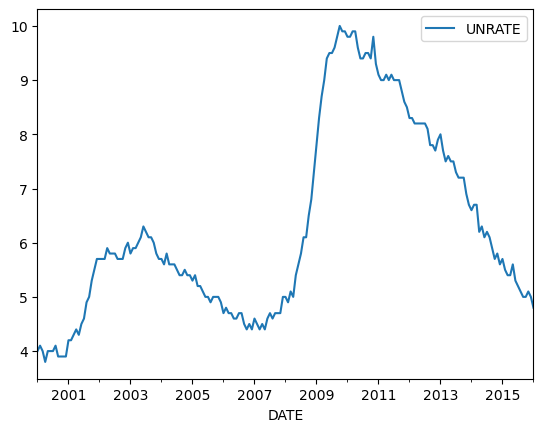

In [14]:
unemp.plot()

In [17]:
unemp.head()

,UNRATE
DATE,
2000-01-01,4.0
2000-02-01,4.1
2000-03-01,4.0
2000-04-01,3.8
2000-05-01,4.0


In [20]:
unemp

,UNRATE
DATE,
2000-01-01,4.0
2000-02-01,4.1
2000-03-01,4.0
2000-04-01,3.8
2000-05-01,4.0
...,...
2015-09-01,5.0
2015-10-01,5.0
2015-11-01,5.1


In [23]:
# By passing these arrays to PeriodIndex with a frequency, you can combine them to form an index for the DataFrame:
unemp['Date'] = pd.to_datetime(unemp.index)

In [24]:
unemp['Date']

DATE
2000-01-01   2000-01-01
2000-02-01   2000-02-01
2000-03-01   2000-03-01
2000-04-01   2000-04-01
2000-05-01   2000-05-01
                ...    
2015-09-01   2015-09-01
2015-10-01   2015-10-01
2015-11-01   2015-11-01
2015-12-01   2015-12-01
2016-01-01   2016-01-01
Name: Date, Length: 193, dtype: datetime64[ns]

In [25]:
index = pd.PeriodIndex(year=unemp['Date'].dt.year, quarter=unemp['Date'].dt.quarter, freq='Q-DEC')

In [26]:
index

PeriodIndex(['2000Q1', '2000Q1', '2000Q1', '2000Q2', '2000Q2', '2000Q2',
             '2000Q3', '2000Q3', '2000Q3', '2000Q4',
             ...
             '2015Q2', '2015Q2', '2015Q2', '2015Q3', '2015Q3', '2015Q3',
             '2015Q4', '2015Q4', '2015Q4', '2016Q1'],
            dtype='period[Q-DEC]', length=193)

# Resampling and Frequency Conversion 
Resampling refers to the process of converting a time series from one frequency to another. Aggregating higher frequency data to lower frequency is called downsampling, while converting lower frequency to higher frequency is called unsampling. 

```python

In [2]:
# pandas objects are equipped with a resample method, which is the workhorse function for frequency conversion. 
import pandas as pd 
rng = pd.date_range('1/1/2000', periods=100, freq='D') 

In [5]:
from pandas import Series, DataFrame 
import numpy as np 
ts = Series(np.random.randn(len(rng)), index=rng)

In [7]:
ts.resample('M').mean()

2000-01-31   -0.417443
2000-02-29   -0.059816
2000-03-31   -0.014102
2000-04-30   -0.037043
Freq: M, dtype: float64

In [9]:
ts.resample('M', kind='period').mean() 

2000-01   -0.417443
2000-02   -0.059816
2000-03   -0.014102
2000-04   -0.037043
Freq: M, dtype: float64

In [10]:
# resample is a flexible and high-performance method that can be used to process very large time series. 
# The following table summarizes the main options available in resample:
# Argument      Description
# freq          String or DateOffset indicating desired resampled frequency
# how           String indicating aggregation method (e.g., 'mean', 'ohlc', 'sum', 'last', 'first', 'median')
# axis          default 0
# fill_method='None'    For downsampling, specify how to interpolate when resampling
# closed='right'        For downsampling, specify which end of the interval is closed
# label='right'         For downsampling, specify which end of the interval is labeled
# loffset='None'       Time adjustment to the bin edge
# limit='None'         For downsampling, the maximum number of periods to resample
# kind          Period or timestamp resampling
# convention    For PeriodIndex only, whether to return the start or end of the interval
# base          For start day or month frequency, the day of the month to anchor the subperiods
# on            For timestamp resampling, the timestamp to use for anchoring the subperiods

# Downsampling
Aggregating data to a regular, lower frequency is a pretty normal time series task. The data you're aggregating doesn't need to be fixed frequently. The desired frequency defines bin edges that are used to slice the time series into pieces to aggregate. 

```python

In [11]:
# For example to convert to monthly "M" or "BM", the data need to chopped up into one month intervals. 
# Each interval is said to be half-open, meaning that it includes the start time but not the end time. 
# the union of the intervals is the whole time period. 
# There are a couple things to think about when using resample to downsample data: 
# Which side of each interval is closed
# How to label each aggregated bin, either with the start of the interval or the end
# To illustrate, suppose you have a DataFrame with daily data and you want to aggregate to monthly data.
# The default resampling behavior is to label the right side of the bin.
# To change this to the left, you can pass closed='left':
rng = pd.date_range('1/1/2000', periods=12, freq='T') 

In [13]:
ts = Series(np.arange(12), index=rng)

In [34]:
ts

2000-01-01 00:00:00     0
2000-01-01 00:01:00     1
2000-01-01 00:02:00     2
2000-01-01 00:03:00     3
2000-01-01 00:04:00     4
2000-01-01 00:05:00     5
2000-01-01 00:06:00     6
2000-01-01 00:07:00     7
2000-01-01 00:08:00     8
2000-01-01 00:09:00     9
2000-01-01 00:10:00    10
2000-01-01 00:11:00    11
Freq: T, dtype: int64

In [35]:
# suppose you wanted to aggregate this data into five-minute chunks or bars by taking the sum of each group:
ts.resample('5min', closed='right').sum() 

1999-12-31 23:55:00     0
2000-01-01 00:00:00    15
2000-01-01 00:05:00    40
2000-01-01 00:10:00    11
Freq: 5T, dtype: int64

In [15]:
# As you can see, the resulting time series is labeled by the timestamps from the left side of each bin. 
# By passing label='right', you can label them with the right bin edge:
ts.resample('5min', closed='right', label='right').sum() 

2000-01-01 00:00:00     0
2000-01-01 00:05:00    15
2000-01-01 00:10:00    40
2000-01-01 00:15:00    11
Freq: 5T, dtype: int64

![](resampling_illustration.png)

In [17]:
ts.resample('5min', loffset='-1s')
# This also could have been written as:
ts.resample('5min').sum()

/var/folders/vq/73zp4qns2cjdsxcw0bzvh98w0000gn/T/ipykernel_93881/2222590962.py:1: FutureWarning: 'loffset' in .resample() and in Grouper() is deprecated.

>>> df.resample(freq="3s", loffset="8H")

becomes:

>>> from pandas.tseries.frequencies import to_offset
>>> df = df.resample(freq="3s").mean()
>>> df.index = df.index.to_timestamp() + to_offset("8H")

  ts.resample('5min', loffset='-1s')


2000-01-01 00:00:00    10
2000-01-01 00:05:00    35
2000-01-01 00:10:00    21
Freq: 5T, dtype: int64

# Open-High-Low-Close(OHLC) resampling 

In [19]:
# In finance, an ubiquitous time series transformation is to compute the cumulative sum of returns. 
# This can be done with the cumsum method and then reindexed with resample: 
ts.resample('5min').ohlc() 

,open,high,low,close
2000-01-01 00:00:00,0,4,0,4
2000-01-01 00:05:00,5,9,5,9
2000-01-01 00:10:00,10,11,10,11


In [1]:
import pandas as pd 
import numpy as np
rng = pd.date_range('1/1/2000', periods=100, freq='D') 

In [3]:
from pandas import Series, DataFrame
ts = Series(np.random.randn(len(rng)), index=rng) 

In [4]:
ts.groupby(lambda x: x.month).mean()   

1    0.100486
2   -0.176939
3    0.118588
4    0.174525
dtype: float64

In [5]:
ts.groupby(lambda x: x.weekday).mean()

0   -0.100765
1   -0.271702
2   -0.128804
3    0.391967
4    0.086017
5    0.131654
6    0.105465
dtype: float64

 # Unsampling and Interpolation 
 When converting from a low frequency to a higher frequency, no aggregation is needed: 
 Let's consider some with weekly data: 

In [6]:
frame = DataFrame(
    np.random.randn(2,4), 
    index=pd.date_range('1/1/2000', periods=2, freq='W-WED'), 
    columns=['Colorado', 'Texas', 'New York', 'Ohio']) 

In [7]:
frame[:5] 

,Colorado,Texas,New York,Ohio
2000-01-05,0.641941,1.181986,-0.708218,-1.156525
2000-01-12,-0.530221,-0.919942,0.418707,0.040561


In [8]:
# when resampling this to daily frequency, by default missing values are introduced: 
df_daily = frame.resample('D') 

In [12]:
df_daily

In [14]:
# suppose you wanted to fill forward each weekly value on the non-Wednesdays. 
# the same filling or interpolation methods available in the fillna and reindex methods are available for resampling: 
frame.resample('D').ffill() 

,Colorado,Texas,New York,Ohio
2000-01-05,0.641941,1.181986,-0.708218,-1.156525
2000-01-06,0.641941,1.181986,-0.708218,-1.156525
2000-01-07,0.641941,1.181986,-0.708218,-1.156525
2000-01-08,0.641941,1.181986,-0.708218,-1.156525
2000-01-09,0.641941,1.181986,-0.708218,-1.156525
2000-01-10,0.641941,1.181986,-0.708218,-1.156525
2000-01-11,0.641941,1.181986,-0.708218,-1.156525
2000-01-12,-0.530221,-0.919942,0.418707,0.040561


In [15]:
frame.resample('D').fillna(limit=2, method='ffill')


,Colorado,Texas,New York,Ohio
2000-01-05,0.641941,1.181986,-0.708218,-1.156525
2000-01-06,0.641941,1.181986,-0.708218,-1.156525
2000-01-07,0.641941,1.181986,-0.708218,-1.156525
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,-0.530221,-0.919942,0.418707,0.040561


In [16]:
# Notably, the new date index need not overlap with the old one at all:
frame.resample('W-THU').ffill() 

,Colorado,Texas,New York,Ohio
2000-01-06,0.641941,1.181986,-0.708218,-1.156525
2000-01-13,-0.530221,-0.919942,0.418707,0.040561


# Resampling with Periods 
Resampling is similar to groupby: you call resample to group the data, then call an aggregation function: 

```python 

In [17]:
# Resampling data indexed by periods is reasonably straightforward and works as you would hope 

frame = DataFrame(
    np.random.randn(24,4),
    index=pd.period_range('1-2000', '12-2001', freq='M'),
    columns=['Colorado', 'Texas', 'New York', 'Ohio']
)

In [18]:
frame[:5]

,Colorado,Texas,New York,Ohio
2000-01,0.491071,-1.759582,-2.729207,-0.048942
2000-02,-0.222872,0.023832,0.956154,0.691101
2000-03,0.924794,1.996501,1.264348,-0.317573
2000-04,0.364732,0.091139,0.115601,1.025885
2000-05,0.393866,-1.792346,-1.650436,-0.237068


In [19]:
annual_frame = frame.resample('A-DEC').mean() 

In [20]:
annual_frame

,Colorado,Texas,New York,Ohio
2000,0.232564,-0.369231,-0.032447,-0.107967
2001,0.460200,0.056334,-0.191499,-0.390448


In [22]:
# Upsampling is more nuanced as you must make a decision about which end of the timespan in the new frequency to place the values 
# before resampling, just like the "asfreq" method. The "convention" argument defaults to 'start' and can also be 'end':
# Q-DEC: Quarterly, year ending in December
annual_frame.resample('Q-DEC').ffill() 

,Colorado,Texas,New York,Ohio
2000Q1,0.232564,-0.369231,-0.032447,-0.107967
2000Q2,0.232564,-0.369231,-0.032447,-0.107967
2000Q3,0.232564,-0.369231,-0.032447,-0.107967
2000Q4,0.232564,-0.369231,-0.032447,-0.107967
2001Q1,0.460200,0.056334,-0.191499,-0.390448
2001Q2,0.460200,0.056334,-0.191499,-0.390448
2001Q3,0.460200,0.056334,-0.191499,-0.390448
2001Q4,0.460200,0.056334,-0.191499,-0.390448


In [25]:
annual_frame.resample('Q-DEC', convention='start').ffill()

,Colorado,Texas,New York,Ohio
2000Q1,0.232564,-0.369231,-0.032447,-0.107967
2000Q2,0.232564,-0.369231,-0.032447,-0.107967
2000Q3,0.232564,-0.369231,-0.032447,-0.107967
2000Q4,0.232564,-0.369231,-0.032447,-0.107967
2001Q1,0.460200,0.056334,-0.191499,-0.390448
2001Q2,0.460200,0.056334,-0.191499,-0.390448
2001Q3,0.460200,0.056334,-0.191499,-0.390448
2001Q4,0.460200,0.056334,-0.191499,-0.390448


In [26]:
# Since periods refer to timespans, the rules about unsampling and downsampling are more rigid: 
# In downsampling, the target frequency must be a subperiod of the source frequency 
# In upsampling, the target frequency must be a superperiod of the source frequency 
# If these rules are not satisfied, an exception will be raised. 
# This mainly affects the quarterly, annual, and weekly frequencies. 
# For example, the timespans defined by Q-MAR are not regular, because they are not all of the same length. 
annual_frame.resample('Q-MAR').ffill() 

,Colorado,Texas,New York,Ohio
2000Q4,0.232564,-0.369231,-0.032447,-0.107967
2001Q1,0.232564,-0.369231,-0.032447,-0.107967
2001Q2,0.232564,-0.369231,-0.032447,-0.107967
2001Q3,0.232564,-0.369231,-0.032447,-0.107967
2001Q4,0.460200,0.056334,-0.191499,-0.390448
2002Q1,0.460200,0.056334,-0.191499,-0.390448
2002Q2,0.460200,0.056334,-0.191499,-0.390448
2002Q3,0.460200,0.056334,-0.191499,-0.390448


# Time Series Plotting
Plots with pandas time series have improved date formatting compared with the standard Matplotlib plots. 

```python

In [28]:
# US stock from Yahoo Finance 
import yfinance as yf
import datetime

start = datetime.datetime(2010, 1, 1)
end = datetime.datetime(2016, 1, 1)

apple = yf.download('AAPL', start=start, end=end)

print(apple.head()) 

[*********************100%%**********************]  1 of 1 completed
                Open      High       Low     Close  Adj Close     Volume
Date                                                                    
2010-01-04  7.622500  7.660714  7.585000  7.643214   6.470741  493729600
2010-01-05  7.664286  7.699643  7.616071  7.656429   6.481928  601904800
2010-01-06  7.656429  7.686786  7.526786  7.534643   6.378827  552160000
2010-01-07  7.562500  7.571429  7.466071  7.520714   6.367032  477131200
2010-01-08  7.510714  7.571429  7.466429  7.570714   6.409363  447610800


<Axes: xlabel='Date'>

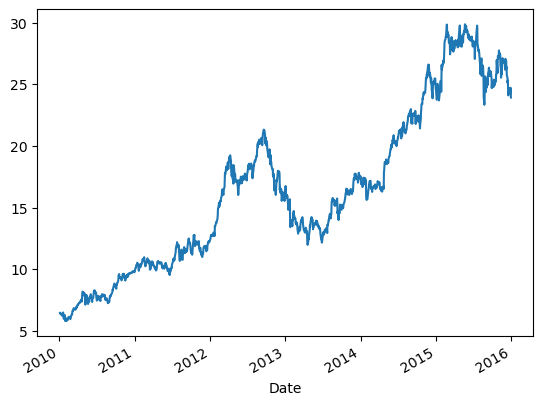

In [29]:
apple['Adj Close'].plot()

<Axes: xlabel='Date'>

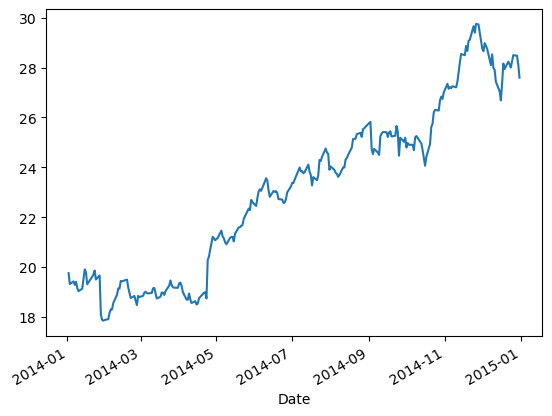

In [32]:
apple.loc['2014-01-01':'2014-12-31']['Close'].plot() 

<Axes: xlabel='Date'>

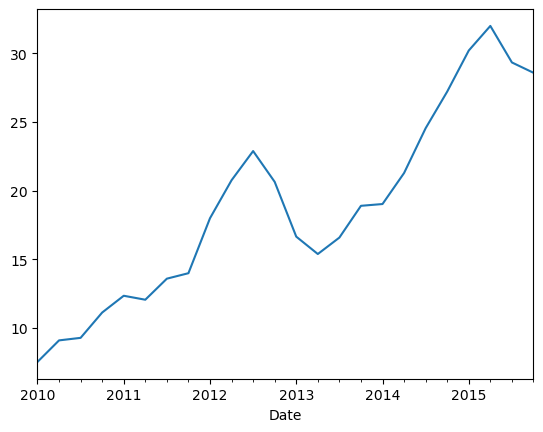

In [34]:
# Quarterly frequency data is also more nicely formatted with quarterly markers, 
# something that would be quite a bit more work to do by hand: 
apple['Close'].resample('Q-DEC').mean().plot() 

# Moving Window Functions 
A common class of array transformations intended for time series operations are statistics and other functions evaluated over a sliding window or with exponentially decaying weights. This can be useful for smoothing noisy or gappy data. 

```python

<Axes: xlabel='Date'>

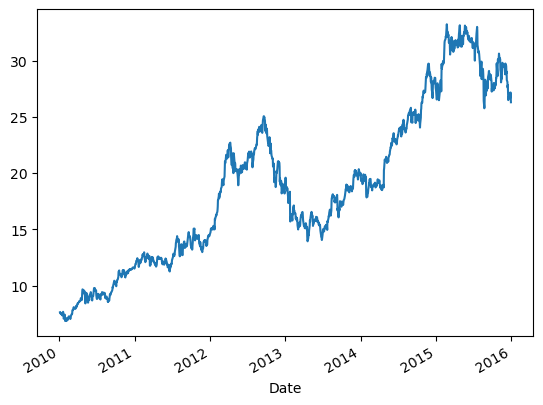

In [35]:
apple['Close'].plot()

<Axes: xlabel='Date'>

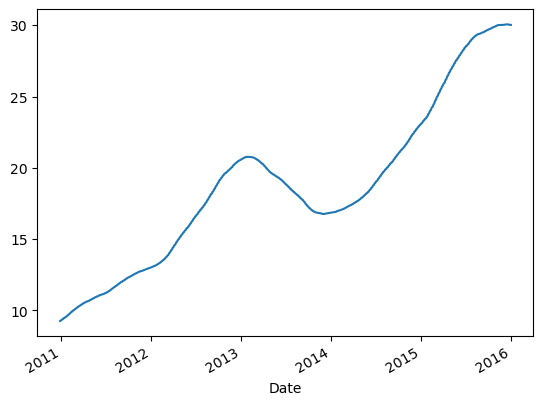

In [37]:
pd.Series(apple['Close']).rolling(window=250).mean().plot()

In [38]:
apple_std250 = pd.Series(apple['Close']).rolling(window=250).std() 

<Axes: xlabel='Date'>

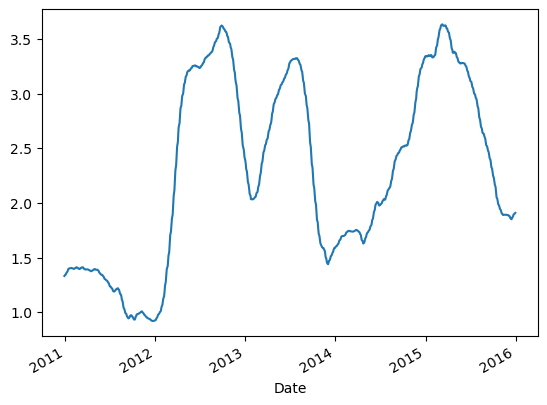

In [39]:
apple_std250.plot() 

In [40]:
# To compute an "expanding window mean", you can see that an expanding window is just a special case where the window is the length of the time series. 
# but only one or more periods is required to compute a value: 
expanding_mean = pd.Series(apple['Close']).expanding().mean()

<Axes: xlabel='Date'>

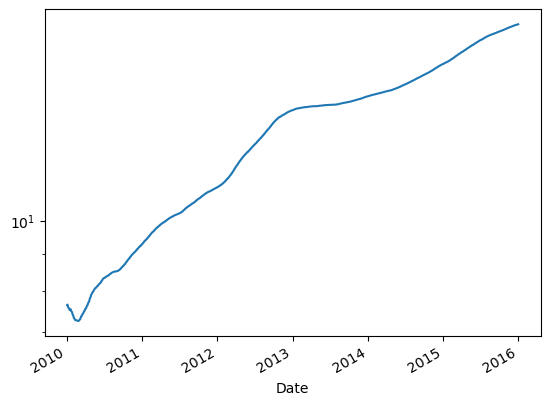

In [41]:
expanding_mean.plot(logy=True)

In [42]:
# Moving window and exponentially-weighted functions 
# Function         Description 
# count            Number of non-NA observations in the time window
# sum              Sum of values in the time window
# mean             Mean of values in the time window
# median           Median of values in the time window
# var              Sample variance of values in the time window
# std              Sample standard deviation of values in the time window
# min              Minimum value in the time window
# max              Maximum value in the time window
# corr             Correlation of values in the time window
# cov              Covariance of values in the time window  
# skew             Sample skewness of values in the time window
# kurt             Sample kurtosis of values in the time window
# quantile         Sample quantile of values in the time window
# apply            Arbitrary function application in the time window
# aggregate        Compute multiple function at once
# ohlc             Open-high-low-close resampling of a time series